<a href="https://colab.research.google.com/github/luisansa/Altura-store-An-lise-/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [50]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [48]:
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
loja1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")

In [54]:
loja1['loja'] = 'loja 1'
loja2['loja'] = 'loja 2'
loja3['loja'] = 'loja 3'
loja4['loja'] = 'loja 4'

df = pd.concat([loja1,loja2,loja3,loja4])
print (df['loja'].unique())
faturamento_loja = df.groupby ('loja') ['Preço'].sum ().reset_index()
print (faturamento_loja)

['loja 1' 'loja 2' 'loja 3' 'loja 4']
     loja       Preço
0  loja 1  1534509.12
1  loja 2  1488459.06
2  loja 3  1464025.03
3  loja 4  1384497.58


In [30]:
print (df.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')


# 2. Vendas por Categoria


In [104]:
loja1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")



In [69]:
vendas_categoria = df.groupby(['loja', 'Categoria do Produto']).agg(quantidade=('Produto','count'), valor_total=('Preço','sum')).reset_index()
vendas_categoria['loja'] = pd.Categorical(vendas_categoria['loja'], categories=['loja 1', 'loja 2', 'loja 3', 'loja 4'], ordered=True)
vendas_categoria = vendas_categoria.sort_values(by=['loja', 'quantidade'], ascending=[True, False])
print(vendas_categoria)

      loja   Categoria do Produto  quantidade  valor_total
6   loja 1                 moveis         465    250178.11
2   loja 1            eletronicos         448    572659.23
0   loja 1             brinquedos         324     23993.78
1   loja 1       eletrodomesticos         312    484913.36
3   loja 1        esporte e lazer         284     52387.55
4   loja 1  instrumentos musicais         182    121731.69
5   loja 1                 livros         173     11713.92
7   loja 1  utilidades domesticas         171     16931.48
14  loja 2                 moveis         442    235234.68
10  loja 2            eletronicos         422    547773.71
8   loja 2             brinquedos         313     21262.21
9   loja 2       eletrodomesticos         305    464758.13
11  loja 2        esporte e lazer         275     46326.09
12  loja 2  instrumentos musicais         224    139987.03
13  loja 2                 livros         197     13454.35
15  loja 2  utilidades domesticas         181     19662.

# 3. Média de Avaliação das Lojas

In [73]:
media_avaliacao_loja = df.groupby('loja')['Avaliação da compra'].mean().reset_index()
print(media_avaliacao_loja)

     loja  Avaliação da compra
0  loja 1             3.976685
1  loja 2             4.037304
2  loja 3             4.048326
3  loja 4             3.995759


In [79]:
media_avaliacao_loja_produto = df.groupby(['loja', 'Categoria do Produto'])['Avaliação da compra'].mean().reset_index()
media_avaliacao_loja_produto = media_avaliacao_loja_produto.sort_values(by=['loja', 'Avaliação da compra'], ascending=[True, False])
print(media_avaliacao_loja_produto)

      loja   Categoria do Produto  Avaliação da compra
0   loja 1             brinquedos             4.077160
4   loja 1  instrumentos musicais             4.049451
1   loja 1       eletrodomesticos             4.032051
2   loja 1            eletronicos             4.004464
5   loja 1                 livros             3.976879
6   loja 1                 moveis             3.946237
3   loja 1        esporte e lazer             3.897887
7   loja 1  utilidades domesticas             3.748538
14  loja 2                 moveis             4.092760
9   loja 2       eletrodomesticos             4.072131
15  loja 2  utilidades domesticas             4.071823
11  loja 2        esporte e lazer             4.065455
12  loja 2  instrumentos musicais             4.035714
8   loja 2             brinquedos             4.025559
10  loja 2            eletronicos             3.971564
13  loja 2                 livros             3.949239
16  loja 3             brinquedos             4.196825
22  loja 3

# 4. Produtos Mais e Menos Vendidos

In [90]:
vendas_por_loja_produto_sorted = vendas_por_loja_produto.sort_values(by=['loja', 'Numero de Vendas'], ascending=[True, False])
display(vendas_por_loja_produto_sorted)

,loja,Produto,Numero de Vendas
24,loja 1,Guarda roupas,60
37,loja 1,Micro-ondas,60
47,loja 1,TV Led UHD 4K,60
43,loja 1,Secadora de roupas,58
3,loja 1,Blocos de montar,56
...,...,...,...
176,loja 4,Geladeira,38
187,loja 4,Lavadora de roupas,38
202,loja 4,Violão,37
177,loja 4,Guarda roupas,34


# 5. Frete Médio por Loja


In [91]:
custo_frete_por_loja = df.groupby('loja')['Frete'].mean().reset_index()
print(custo_frete_por_loja)

     loja      Frete
0  loja 1  34.691805
1  loja 2  33.621941
2  loja 3  33.074464
3  loja 4  31.278997


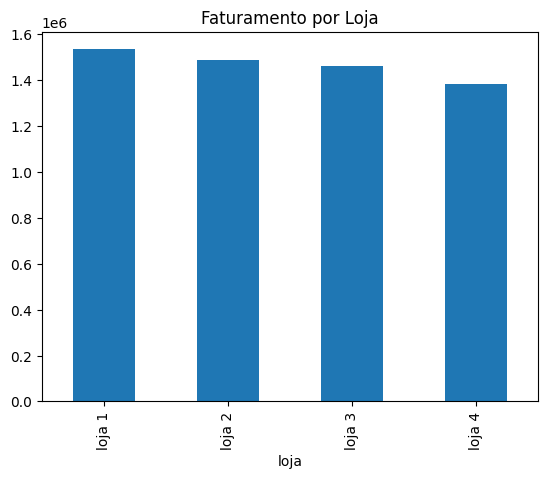

In [95]:
faturamento_loja=df.groupby('loja') ['Preço'].sum()
faturamento_loja.plot (kind='bar', title= 'Faturamento por Loja')
plt.show()

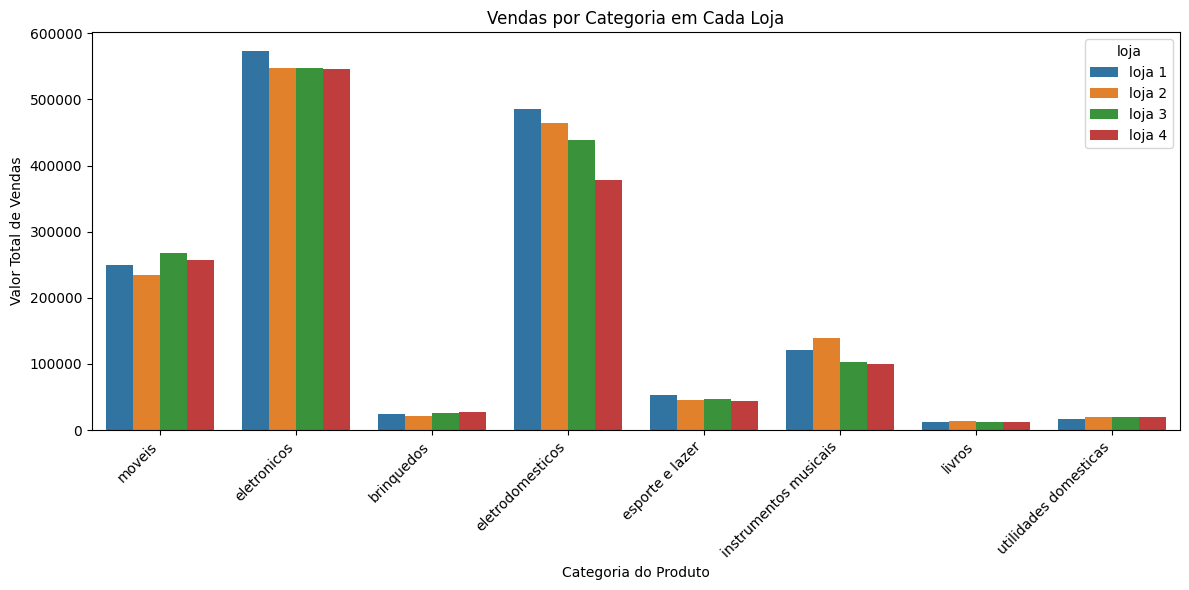

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_categoria, x='Categoria do Produto', y='valor_total', hue='loja')
plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

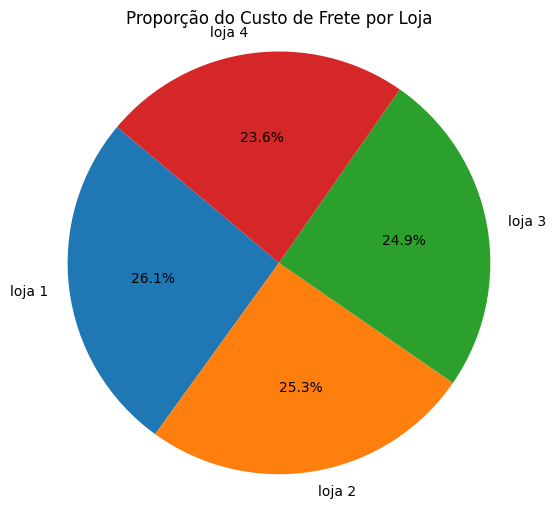

In [100]:
plt.figure(figsize=(6, 6))
plt.pie(custo_frete_por_loja['Frete'], labels=custo_frete_por_loja['loja'], autopct='%1.1f%%', startangle=140)
plt.title('Proporção do Custo de Frete por Loja')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [103]:
import plotly.express as px

fig = px.scatter(media_avaliacao_loja, x='loja', y='Avaliação da compra',
                 title='Avaliação Média da Compra por Loja',
                 labels={'loja': 'Loja', 'Avaliação da compra': 'Avaliação Média da Compra'})
fig.update_layout(yaxis_range=[3, 5])
fig.update_traces(marker=dict(size=10))
fig.show()


# **Relatório de Análise - Lojas da Alura Store**

Após análise dos dados das quatro lojas, considerando os indicadores de **faturamento total, custo de frete e avaliação dos clientes**, cheguei às seguintes conclusões:



*   **Loja 4** apresenta o ***menor faturamento total*** em comparação às demais lojas;

*   Apesar de a ***percentual de frete sobre as vendas ser levemente inferior*** em relação a outras lojas, em termos absolutos (fluxo de venda x frete), a loja 4 ainda possui o ***maior custo de frete.***


*   Além disso, a loja 4 também obteve a ***menor avaliação média dos clientes***, indicando menor satisfação em relação aos serviços e produtos oferecidos.

Diante desses fatores conjuntos, a ***Loja 4*** se mostra a melhor opção a ser vendida para viabilizar o investimento pretendido pelo sr. João.

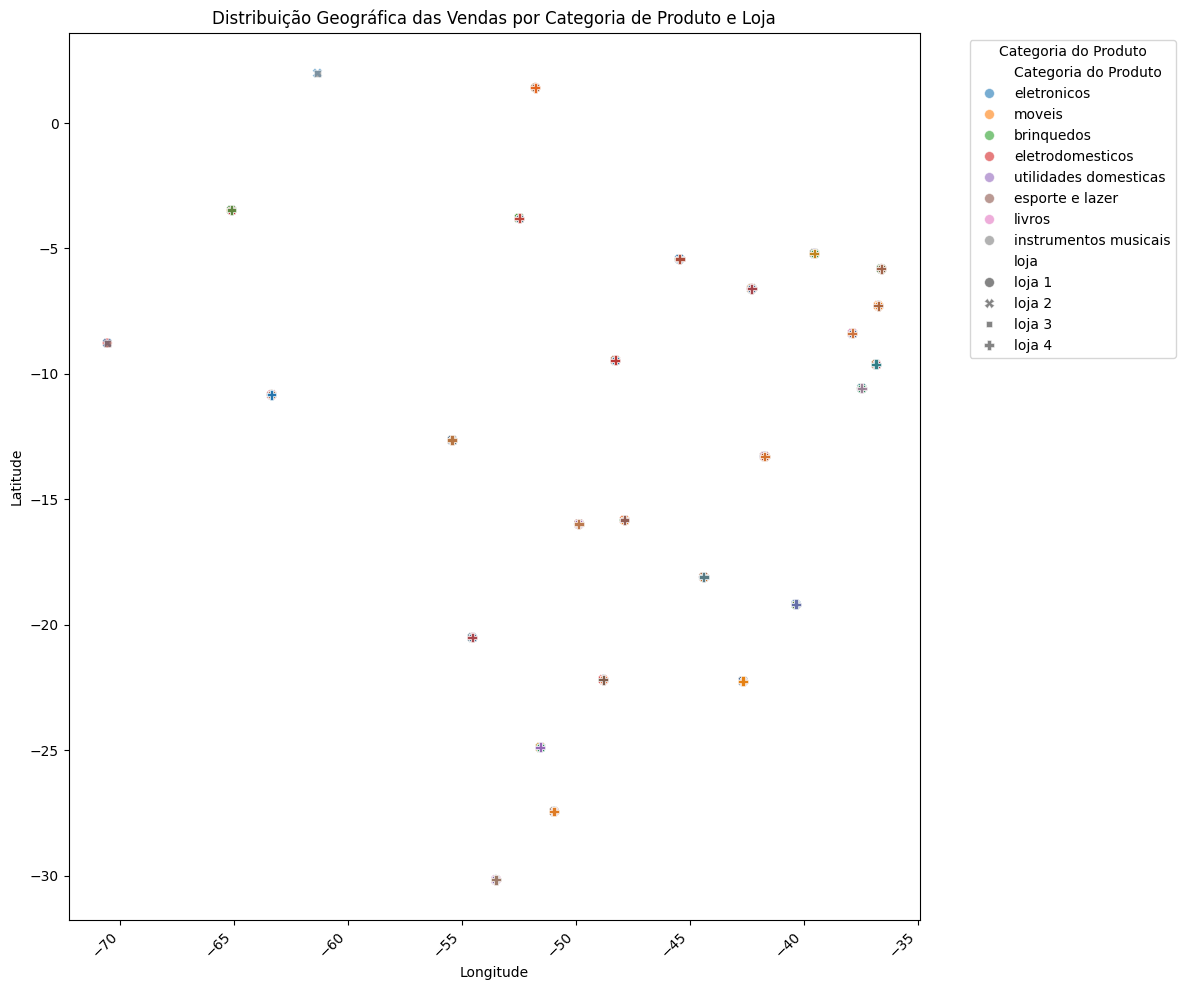

In [113]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='lon', y='lat', hue='Categoria do Produto', style='loja', s=50, alpha=0.6)
plt.title('Distribuição Geográfica das Vendas por Categoria de Produto e Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()